# PCA biplot
### Reference:
Visualization: https://github.com/teddyroland/python-biplot/blob/master/biplot.py

Standardization, Contribution:  https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
# import data

my_csv = 'Haga_PCA_data.csv'  ## path from the dataset

dat_o = pd.read_csv(my_csv, index_col=0)
dat_o.head()

,Jump-H,Jump-V,Back,Grip,50m,Leap
Student-1,49.0,65.0,150.0,49.0,7.1,480.0
Student-2,50.0,57.0,167.0,45.0,6.8,490.0
Student-3,42.0,54.0,174.0,54.0,6.1,410.0
Student-4,47.0,75.0,205.0,54.0,7.1,580.0
Student-5,45.0,65.0,155.0,60.0,6.8,520.0


In [3]:
# standardization
dat = dat_o.iloc[:, 0:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dat.head()

,Jump-H,Jump-V,Back,Grip,50m,Leap
Student-1,0.204162,0.244113,-0.271848,0.535400,0.894119,-0.154190
Student-2,0.501899,-1.241794,0.588521,-0.262004,0.077749,0.053373
Student-3,-1.879995,-1.799009,0.942791,1.532155,-1.827113,-1.607130
Student-4,-0.391311,2.101497,2.511699,1.532155,0.894119,1.921440
Student-5,-0.986785,0.244113,-0.018798,2.728262,0.077749,0.676062


In [4]:
## perform PCA

n = len(dat.columns)

pca = PCA(n_components = n)
# can be set to any integer

pca.fit(dat)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
## project data into PC space

# 0,1 denote PC1 and PC2
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,1]

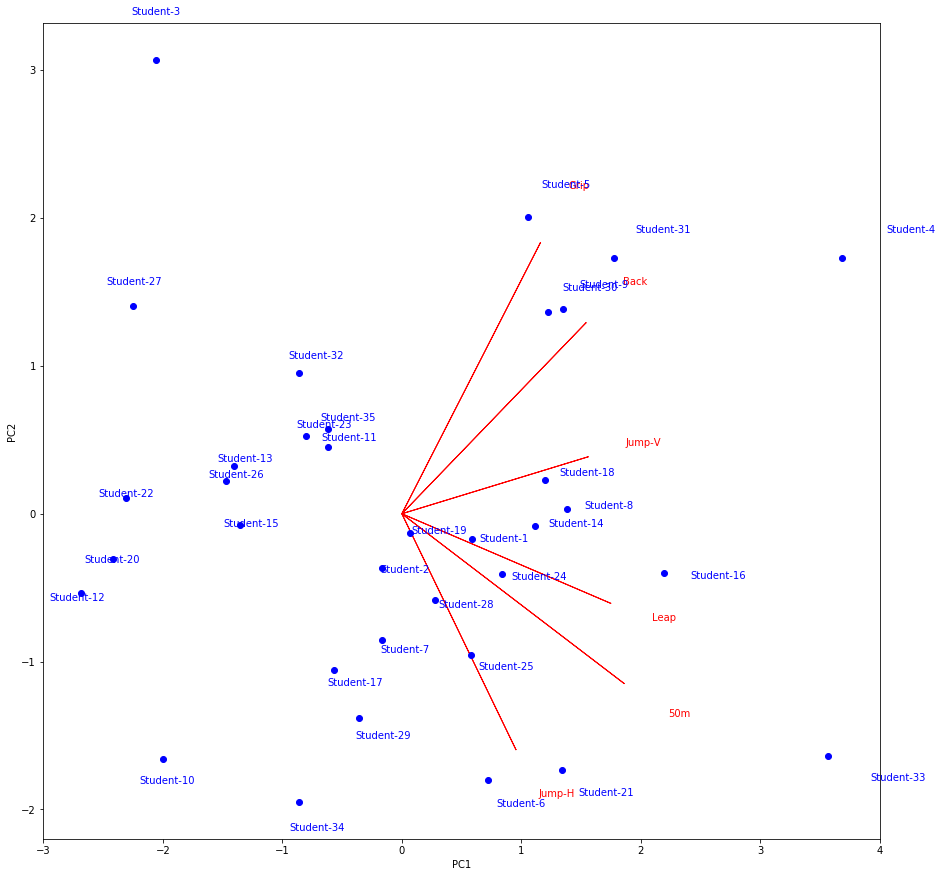

In [6]:
## visualize projections
    
plt.figure(figsize=(15, 15))

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
  plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys), color='r', width=0.0005, head_width=0.0025)
  plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
  plt.plot(xs[i], ys[i], 'bo')
  plt.text(xs[i]*1.1, ys[i]*1.1, list(dat.index)[i], color='b')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig('pca_biplot_PC1_vs_PC2.png')
plt.show()

In [7]:
## project data into PC space

# 0,2 denote PC1 and PC3
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[2]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,2]

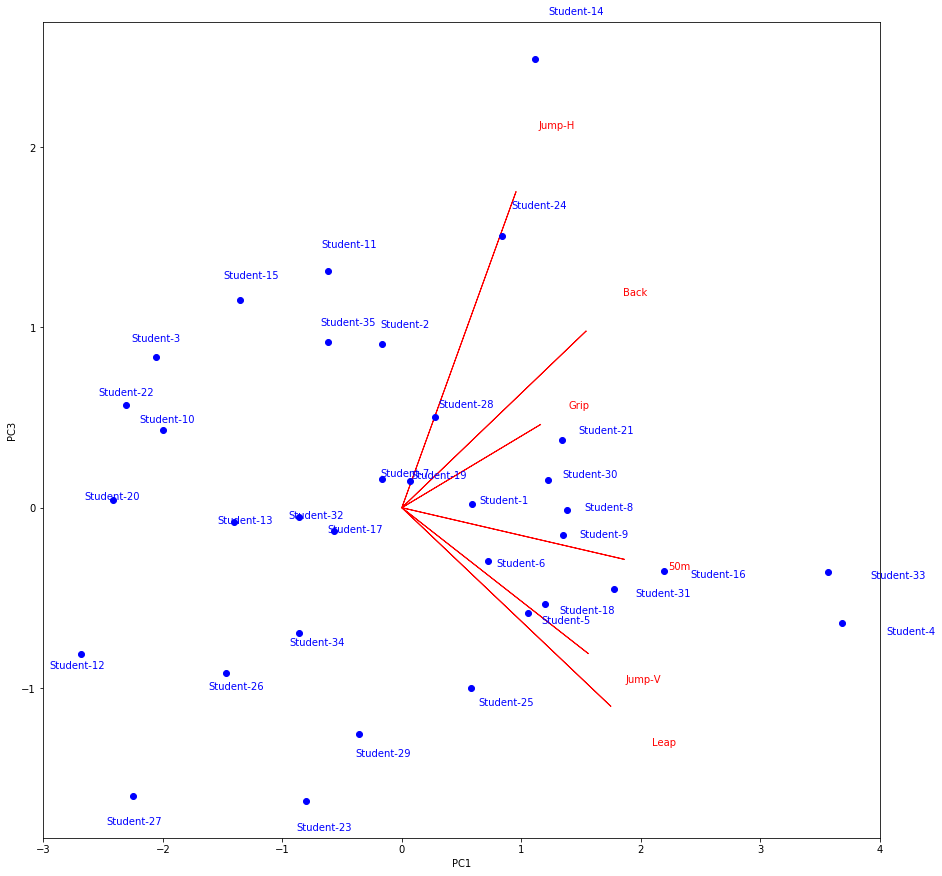

In [8]:
## visualize projections

plt.figure(figsize=(15, 15))

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.1, ys[i]*1.1, list(dat.index)[i], color='b')

plt.xlabel("PC1")
plt.ylabel("PC3")
plt.savefig('pca_biplot_PC1_vs_PC3.png')
plt.show()

In [9]:
# contribuion rates
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dat.columns))])

,0
PC1,0.432070
PC2,0.237726
PC3,0.128449
PC4,0.107854
PC5,0.062489
PC6,0.031411


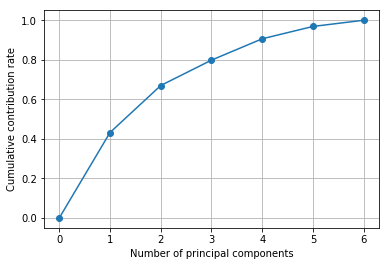

In [10]:
# visualize cumulative contribution rate
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.savefig('pca_contribution.png')
plt.show()